In [23]:
import nltk
# nltk.download() <-- Run this if it's your first time using nltk to download all of the datasets and models
import pandas as pd
import re

In [24]:
df1 = pd.read_csv("Slipper.csv")
df2 = pd.read_csv("Slipper2.csv")

In [25]:
data = pd.concat([df1, df2], ignore_index=True)
data.head()

,content
0,Received items not the same as advertised.\nTh...
1,the item not as advertised
2,dalam gambar tebal dah terima selipar tipis..b...
3,"order green dapat Oren, sad."
4,oder black and green but arrived black and yel...


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  1001 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [27]:
print("Shape of data=>",data.shape)

Shape of data=> (1001, 1)


In [28]:
data.isnull().sum()

content    0
dtype: int64

In [29]:
for index,text in enumerate(data['content'][35:40]):
  print('\nReview %d:\n'%(index+1),text)


Review 1:
 Nipis sikit x sama macam model yg tebal 4inch tu 😝😅😢😞

Review 2:
 Design:selipar dia nampak nipis sbb dlm gmbr mcm tebal

Review 3:
 Size:  order size 36/37 , yg dapat 38/39 . Besar gilerrrrr , spoil mood nak buat pakai time bersalin nanti 😪 Chat seller , tak respon langsung . Padahal dah read baca tu , kalau size and colournya takde . Inform dulu customer , jgn main pos je size and colour lain pada customer !!!!!!!

Review 4:
 nipis.. huhuu

Review 5:
 I bought creamy green colour but i received sharp yellow. Dissapointed Design:


In [30]:
from collections import Counter
data['temp_list'] = data['content'].apply(lambda x:str(x).split())
top = Counter([item for sublist in data['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,good,272
1,and,167
2,the,137
3,for,115
4,is,114
5,to,84
6,in,83
7,ok,81
8,seller,72
9,not,68


In [31]:
import plotly.express as px
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Comment', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [32]:
fig = px.treemap(temp, path=['Common_words'], values='count',title='Tree of Most Common Words')
fig.show()

Distribution of Character Lengths:
2      32
3       5
4      49
5       6
6      10
       ..
295     1
306     1
344     1
372     1
385     1
Name: content_length, Length: 175, dtype: int64


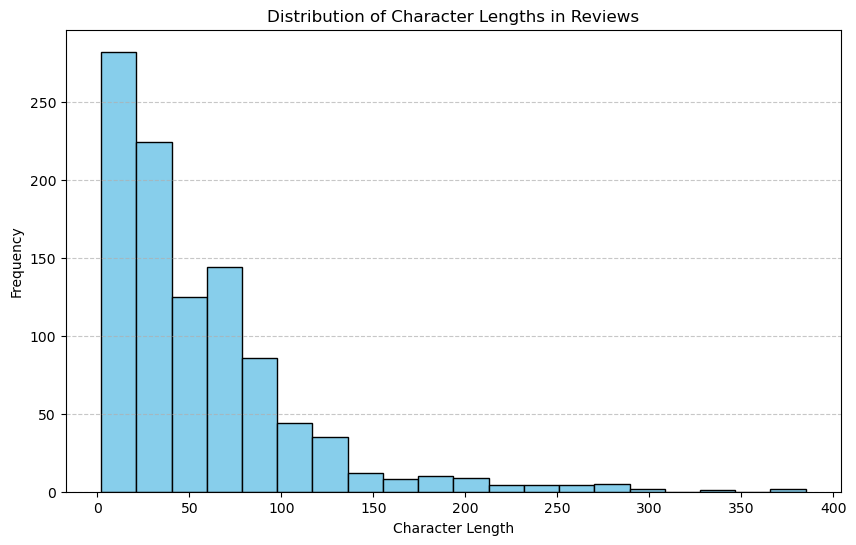

In [33]:
import matplotlib.pyplot as plt

#calculate the total characters for each review
data['content_length'] = data['content'].fillna('').apply(len)


# List unique character lengths and their counts
length_counts = data['content_length'].value_counts().sort_index()

# Display the distribution
print("Distribution of Character Lengths:")
print(length_counts)

# Plot a histogram
plt.figure(figsize=(10, 6))
plt.hist(data['content_length'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Character Lengths in Reviews')
plt.xlabel('Character Length')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Preprocessing stage
1. Remove all words that contain numbers
2. Make all the text lowercase
3. Remove punctuation
4. Tokenize the reviews into words

## remove numbers

In [34]:
print("Before removing number:\n")
print(data.content.loc[37])
#Remove words that contain numbers
df = pd.DataFrame(data)

df['content'] = df['content'].str.replace(r'\b\w*\d\w*\b', '', regex=True)
print("\nAfter removing number:\n")
print(df.content.loc[37])

Before removing number:

Size:  order size 36/37 , yg dapat 38/39 . Besar gilerrrrr , spoil mood nak buat pakai time bersalin nanti 😪 Chat seller , tak respon langsung . Padahal dah read baca tu , kalau size and colournya takde . Inform dulu customer , jgn main pos je size and colour lain pada customer !!!!!!!

After removing number:

Size:  order size / , yg dapat / . Besar gilerrrrr , spoil mood nak buat pakai time bersalin nanti 😪 Chat seller , tak respon langsung . Padahal dah read baca tu , kalau size and colournya takde . Inform dulu customer , jgn main pos je size and colour lain pada customer !!!!!!!


## transform texts to lowercase

In [35]:
print("Before lowercasing:")
print(df.content.loc[36])
#make text to lowercase
df['content'] = df['content'].str.lower()

print("\nAfter lowercasing:")
print(df.content.loc[36])

Before lowercasing:
Design:selipar dia nampak nipis sbb dlm gmbr mcm tebal

After lowercasing:
design:selipar dia nampak nipis sbb dlm gmbr mcm tebal


## Handling Abbreviation

In [36]:
print("Before handling abbreviation:")
print(df.content.loc[36])
# Function to load a custom dictionary from a CSV file
def load_custom_dict(file_path):
    custom_dict_df = pd.read_csv(file_path, encoding='utf-8')
    custom_dict = dict(zip(custom_dict_df['original'], custom_dict_df['translation']))
    return custom_dict

# Function to replace words using a custom dictionary
def replace_with_custom_dict(text, custom_dict):
    words = text.split()
    translated_words = [custom_dict.get(word, word) for word in words]
    return ' '.join(translated_words)

# Load the custom dictionary from the CSV file
custom_dict_path = 'dict.csv'
custom_dict = load_custom_dict(custom_dict_path)

# Apply the function to the 'content' column
df['content'] = df['content'].apply(lambda x: replace_with_custom_dict(x, custom_dict))
print("After handling abbreviation:")
print(df.content.loc[36])

Before handling abbreviation:
design:selipar dia nampak nipis sbb dlm gmbr mcm tebal
After handling abbreviation:
design:selipar dia nampak nipis sebab dalam gambar macam tebal


## Emoji Mapping

In [37]:
print("Before emoji mapping:")
print(df.content.iloc[6])
try:
    import cPickle as pickle
except ImportError: 
    import pickle
import re

with open('Emoji_Dict.p', 'rb') as fp:
    Emoji_Dict = pickle.load(fp)
Emoji_Dict = {v: k for k, v in Emoji_Dict.items()}

def convert_emojis_to_word(text):
    for emot in Emoji_Dict:
        text = re.sub(r'('+emot+')', "_".join(Emoji_Dict[emot].replace(",","").replace(":","").split()), text)
    return text

df['content']  = df['content'].apply(convert_emojis_to_word)
print("After emoji mapping:")
print(df.content.iloc[6])

Before emoji mapping:
很很薄很薄😔
After emoji mapping:
很很薄很薄pensive_face


In [38]:
df.to_csv('emoji_mapped.csv', index=False)

## Remove Emoji

In [39]:
import emoji

# Function to remove emojis
def remove_emojis(text):
    return ''.join(char for char in text if not emoji.emoji_count(char))

# Apply the function to the 'content' column
df['content'] = df['content'].apply(remove_emojis)

print(df)

                                                content  \
0     received items not the same as advertised. the...   
1                            the item not as advertised   
2     dalam gambar tebal sudah terima selipar tipis....   
3                          order green dapat oren, sad.   
4     oder black and green but arrived black and yel...   
...                                                 ...   
996                    not the one shown in pictures!!!   
997                      货不对版 ….but shipping service ok   
998                               wrong colour and size   
999   price is cheap but again it is not what i like...   
1000  overall not as expected...but the price can't ...   

                                              temp_list  content_length  
0     [Received, items, not, the, same, as, advertis...             159  
1                      [the, item, not, as, advertised]              26  
2     [dalam, gambar, tebal, dah, terima, selipar, t...              

## Translate

In [40]:
#pip install googletrans==4.0.0-rc1

In [41]:
print("Before translating:")
print(df.content.iloc[997])
from googletrans import Translator
from langid import classify
def translate_text(text, target_language='en', custom_dict=None):
    try:
        # Detect the language of the text
        lang, _ = classify(text)
        
        # Translate only if the detected language is not the target language
        if lang != target_language:
            translator = Translator()
            translation = translator.translate(text, dest=target_language)
            return translation.text
        else:
            return text  # Return the original text if it's already in the target language
    except Exception as e:
        print(f"Error during translation: {e}")
        return text  # Return the original text in case of an error
    
    
df["content"] = df["content"].apply(translate_text, target_language='en')
print("Before translating:")
print(df.content.iloc[997])

Before translating:
货不对版 ….but shipping service ok
Before translating:
The goods are not right ... .But Shipping Service OK


In [42]:
#make text to lowercase again because some texts transformed into uppercase after translation
df['content'] = df['content'].str.lower()

In [43]:
print(df.content)

0       received items not the same as advertised. the...
1                              the item not as advertised
2       in the thick picture you have received a thin ...
3                            order green dapat oren, sad.
4       oder black and green but arrived black and yel...
                              ...                        
996                      not the one shown in pictures!!!
997     the goods are not right ... .but shipping serv...
998                                 wrong colour and size
999     price is cheap but again it is not what i like...
1000    overall not as expected...but the price can't ...
Name: content, Length: 1001, dtype: object


# spell checker

In [44]:
from spellchecker import SpellChecker
print("Before spelling checking:")
print(df.content.iloc[61])
# Function to correct spelling errors for English words
def correct_spelling(text):
    spell = SpellChecker()
    words = text.split()
    corrected_words = [spell.correction(word) if spell.correction(word) is not None else word for word in words]
    corrected_text = ' '.join(corrected_words)
    return corrected_text

# Apply the spelling correction function to the 'content' column
df['content'] = df['content'].apply(correct_spelling)

print("After spelling checking:")
print(df.content.iloc[61])


Before spelling checking:
photo and stock recd are different. low quality. first and last time purchase.
After spelling checking:
photo and stock read are different low quality first and last time purchase


In [45]:
df.to_csv('spellchecker_checkpoint.csv', index=False)

In [46]:
df = pd.read_csv("spellchecker_checkpoint.csv")
print(df)

                                                content  \
0     received items not the same as advertised they...   
1                            the item not as advertised   
2     in the thick picture you have received a thin ...   
3                            order green apart oren sad   
4     oder black and green but arrived black and yel...   
...                                                 ...   
996                    not the one shown in pictures!!!   
997   the goods are not right ... but shipping servi...   
998                               wrong colour and size   
999   price is cheap but again it is not what i like...   
1000  overall not as expected...but the price can't ...   

                                              temp_list  content_length  
0     ['Received', 'items', 'not', 'the', 'same', 'a...             159  
1            ['the', 'item', 'not', 'as', 'advertised']              26  
2     ['dalam', 'gambar', 'tebal', 'dah', 'terima', ...              

In [47]:
print(df)

                                                content  \
0     received items not the same as advertised they...   
1                            the item not as advertised   
2     in the thick picture you have received a thin ...   
3                            order green apart oren sad   
4     oder black and green but arrived black and yel...   
...                                                 ...   
996                    not the one shown in pictures!!!   
997   the goods are not right ... but shipping servi...   
998                               wrong colour and size   
999   price is cheap but again it is not what i like...   
1000  overall not as expected...but the price can't ...   

                                              temp_list  content_length  
0     ['Received', 'items', 'not', 'the', 'same', 'a...             159  
1            ['the', 'item', 'not', 'as', 'advertised']              26  
2     ['dalam', 'gambar', 'tebal', 'dah', 'terima', ...              

## remove punctuation

In [48]:
print("Before removing punctuation:")
print(df.content.iloc[997])

import string
# Function to remove punctuation including Chinese and Malay punctuation
def remove_punctuation(text):
    # Extend the character class to include Chinese and Malay punctuation
    punctuation_pattern = f"[{string.punctuation}，。、【】‘’“” …《》！？·；：「」『』【】〔〕〈〉﹝﹞〖〗〘〙〚〛〇〡〢〣〤〥〦〧〨〩〪〭〮〯〫〬〰〱〲〳〴〵〶〷〸〹〺〻〼〽〾〿]"
    
    # Replace punctuation with a space
    cleaned_text = re.sub(punctuation_pattern, ' ', text)
    
    return cleaned_text

# Apply the function to the 'content' column in the DataFrame
df['content'] = df['content'].apply(remove_punctuation)

#remove "\n"
def remove_newline_characters(text):
    if pd.notna(text):
        return str(text).replace('\n', ' ')
    else:
        return text

df['content'] = df['content'].apply(remove_newline_characters)

print("After removing punctuation:")
print(df.content.iloc[997])

Before removing punctuation:
the goods are not right ... but shipping service ok
After removing punctuation:
the goods are not right     but shipping service ok


## Tokenization

In [49]:
#pip install langid
#pip install emoji

In [50]:
import spacy
from nltk.tokenize import word_tokenize
print("Before tokenization:")
print(df.content.iloc[997])
# Load spaCy English model
nlp_en = spacy.load("en_core_web_sm")

# Function to tokenize English text
def tokenize_english(text):
    if not isinstance(text, str):
        return []

    # Tokenize English text using spaCy
    tokens = [token.text for token in nlp_en(text)]

    # Remove spaces and single characters
    tokens = [token.strip() for token in tokens if token.strip() and len(token.strip()) > 1]

    return tokens

# Handle NaN values in 'content' column
df['content'] = df['content'].fillna('')

# Tokenize only English comments into words
df['tokenized_content'] = df['content'].apply(tokenize_english)

print("After tokenization:")
print(df.tokenized_content.iloc[997])

Before tokenization:
the goods are not right     but shipping service ok
After tokenization:
['the', 'goods', 'are', 'not', 'right', 'but', 'shipping', 'service', 'ok']


# Normalisation 

## Lemmatization

In [51]:
# python -m spacy download en_core_web_sm

import langid

def detect_language(text):
    lang, confidence = langid.classify(text)
    return lang

# Load spaCy model for English
nlp_en = spacy.load("en_core_web_sm")

# Function for lemmatization
def lemmatize_english(tokens):
    # Using spaCy for English lemmatization
    doc = nlp_en(' '.join(tokens))
    lemmatized_tokens = [token.lemma_ for token in doc]
    return lemmatized_tokens

# Lemmatize only English tokenized comments
df['lemmatized_content'] = df['tokenized_content'].apply(lemmatize_english)

print(df[['content', 'tokenized_content', 'lemmatized_content']])


                                                content  \
0     received items not the same as advertised they...   
1                            the item not as advertised   
2     in the thick picture you have received a thin ...   
3                            order green apart oren sad   
4     oder black and green but arrived black and yel...   
...                                                 ...   
996                    not the one shown in pictures      
997   the goods are not right     but shipping servi...   
998                               wrong colour and size   
999   price is cheap but again it is not what i like...   
1000  overall not as expected   but the price can t ...   

                                      tokenized_content  \
0     [received, items, not, the, same, as, advertis...   
1                      [the, item, not, as, advertised]   
2     [in, the, thick, picture, you, have, received,...   
3                      [order, green, apart, oren, sad]

In [52]:
print("Before lemmatization:")
df.tokenized_content.iloc[997]


Before lemmatization:


['the', 'goods', 'are', 'not', 'right', 'but', 'shipping', 'service', 'ok']

In [53]:
print("After lemmatization:")
df.lemmatized_content.iloc[997]

After lemmatization:


['the', 'good', 'be', 'not', 'right', 'but', 'shipping', 'service', 'ok']

## Stopwords removal

In [54]:

nltk.download('stopwords')

# Download English stopwords list
stop_words_en = set(nltk.corpus.stopwords.words('english'))

# Function to remove English stopwords, add prefix "_" after "no"
def remove_english_stopwords(tokens):
    filtered_tokens = []
    for token in tokens:
        lower_token = token.lower()
        if lower_token == 'not':
            filtered_tokens.append(token + '_')
        elif lower_token not in stop_words_en:
            filtered_tokens.append(token)
    return filtered_tokens

# Handle NaN values in 'lemmatized_content' column
df['lemmatized_content'] = df['lemmatized_content'].fillna('')

# Remove English stopwords for each token in 'lemmatized_content' column
df['filtered_tokenized_content'] = df['lemmatized_content'].apply(remove_english_stopwords)

# Print the DataFrame with the additional 'filtered_tokenized_content' column
print(df[['lemmatized_content', 'filtered_tokenized_content']])


                                     lemmatized_content  \
0     [receive, item, not, the, same, as, advertise,...   
1                       [the, item, not, as, advertise]   
2     [in, the, thick, picture, you, have, receive, ...   
3                      [order, green, apart, oren, sad]   
4     [oder, black, and, green, but, arrive, black, ...   
...                                                 ...   
996                  [not, the, one, show, in, picture]   
997   [the, good, be, not, right, but, shipping, ser...   
998                          [wrong, colour, and, size]   
999   [price, be, cheap, but, again, it, be, not, wh...   
1000  [overall, not, as, expect, but, the, price, ca...   

                             filtered_tokenized_content  
0     [receive, item, not_, advertise, thin, light, ...  
1                               [item, not_, advertise]  
2     [thick, picture, receive, thin, slipper, use, ...  
3                      [order, green, apart, oren, sad]  
4

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wongy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [55]:
print("Before removing stopwords:")
print(df.tokenized_content.iloc[998])
print("After removing stopwords:")
print(df.filtered_tokenized_content.iloc[998])

Before removing stopwords:
['wrong', 'colour', 'and', 'size']
After removing stopwords:
['wrong', 'colour', 'size']


In [56]:
top = Counter([item for sublist in df['filtered_tokenized_content'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp = temp.iloc[1:,:]
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Purples')

,Common_words,count
1,size,284
2,material,186
3,ok,152
4,not_,145
5,delivery,125
6,design,124
7,fast,123
8,upthumbs,120
9,seller,117
10,receive,115


## get sentiment polarity

In [57]:
from textblob import TextBlob

# Convert list of tokens to string
df['text_string'] = df['filtered_tokenized_content'].apply(lambda tokens: ' '.join(tokens))

# Apply TextBlob to get sentiment polarity
df['predicted_sentiment'] = df['text_string'].apply(lambda text: TextBlob(text).sentiment.polarity)

# Categorize sentiment based on polarity
df['predicted_sentiment_category'] = df['predicted_sentiment'].apply(lambda score: 'POSITIVE' if score > 0 else 'NEGATIVE' if score < 0 else 'NEUTRAL')

# Print the DataFrame with the additional columns
print(df[['text_string', 'predicted_sentiment', 'predicted_sentiment_category']])


                                            text_string  predicted_sentiment  \
0     receive item not_ advertise thin light quality...            -0.010000   
1                                   item not_ advertise             0.000000   
2     thick picture receive thin slipper use rumor o...            -0.200000   
3                            order green apart oren sad            -0.350000   
4            oder black green arrive black yellow thumb            -0.133333   
...                                                 ...                  ...   
996                               not_ one show picture             0.000000   
997                 good not_ right shipping service ok             0.352381   
998                                   wrong colour size            -0.500000   
999   price cheap not_ like last time expire lay pot...             0.066667   
1000       overall not_ expect price argue like slipper             0.000000   

     predicted_sentiment_category  
0  

In [58]:
print("Comment:",df.text_string.iloc[2])
print("Polarity:",df.predicted_sentiment.iloc[2])
print("Sentiment:",df.predicted_sentiment_category.iloc[2])

Comment: thick picture receive thin slipper use rumor old way
Polarity: -0.20000000000000004
Sentiment: NEGATIVE


POSITIVE    685
NEUTRAL     197
NEGATIVE    119
Name: predicted_sentiment_category, dtype: int64


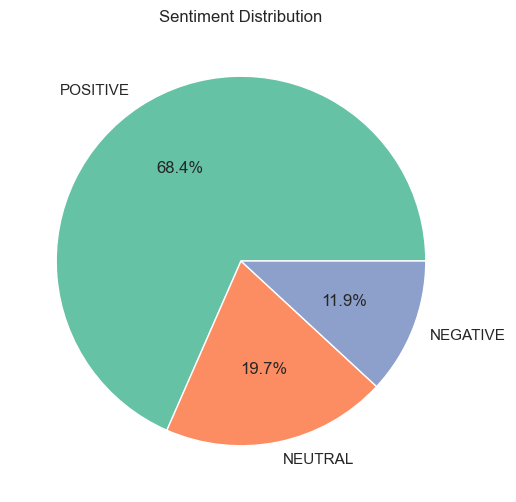

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each sentiment
sentiment_counts = df['predicted_sentiment_category'].value_counts()

# Print the counts
print(sentiment_counts)

# Set the style for the plot
sns.set(style="whitegrid")

# Choose a different color palette (e.g., 'Set2')
colors = sns.color_palette('Set2')

# Plot the sentiment distribution as a pie chart with different colors
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Sentiment Distribution')

# Show the plot
plt.show()


<AxesSubplot:xlabel='predicted_sentiment_category', ylabel='count'>

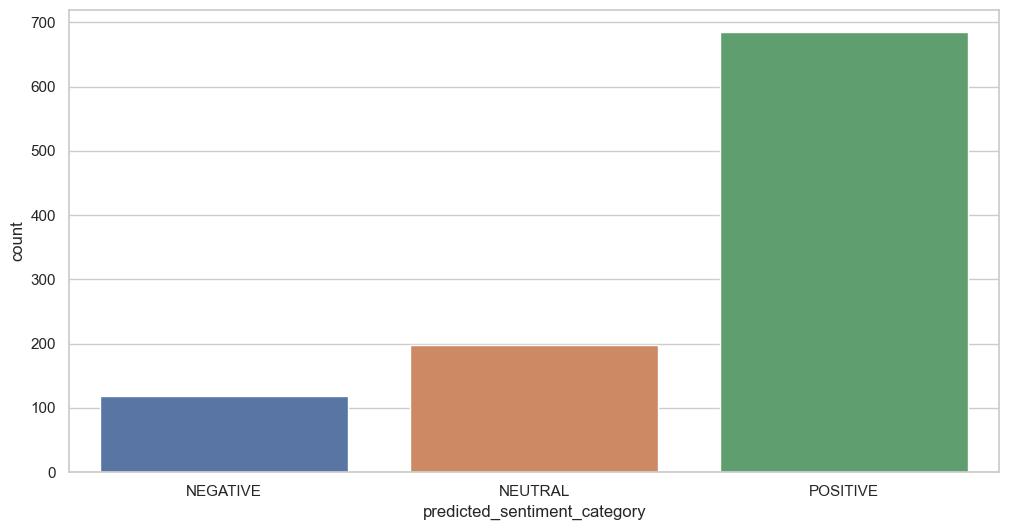

In [60]:
plt.figure(figsize=(12,6))
sns.countplot(x='predicted_sentiment_category',data=df)

## train test split

In [61]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text_string'], df['predicted_sentiment_category'], test_size=0.2, random_state=42)


## TF-IDF

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import RandomOverSampler


# TF-IDF Vectorization
cv = TfidfVectorizer(stop_words='english', max_features=2000)
X_train_cv = cv.fit_transform(X_train) 
X_test_cv = cv.transform(X_test)

# Convert the TF-IDF matrices to DataFrames
X_train_df = pd.DataFrame(X_train_cv.toarray(), columns=cv.get_feature_names_out())
X_test_df = pd.DataFrame(X_test_cv.toarray(), columns=cv.get_feature_names_out())

### Checking classes' distribution

In [63]:
df.predicted_sentiment_category.value_counts()

POSITIVE    685
NEUTRAL     197
NEGATIVE    119
Name: predicted_sentiment_category, dtype: int64

### It is imbalance! Let us balance the classes before modelling

## Oversampling

In [64]:
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_df, y_train)

# Modelling

## Logistic Regression

### Without oversampler

In [65]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import sklearn.metrics  

# Print class distribution in the training set
print("Training Class Distribution:")
print(y_train.value_counts())

# Print class distribution in the testing set
print("\nTesting Class Distribution:")
print(y_test.value_counts())


# Create and train the Logistic Regression model with balanced class weights
logistic_regression_model = LogisticRegression(class_weight="balanced", random_state=42, C=1.4)
logistic_regression_model.fit(X_train_df, y_train)

# Make predictions on the test set
y_pred = logistic_regression_model.predict(X_test_df)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(report)


Training Class Distribution:
POSITIVE    554
NEUTRAL     158
NEGATIVE     88
Name: predicted_sentiment_category, dtype: int64

Testing Class Distribution:
POSITIVE    131
NEUTRAL      39
NEGATIVE     31
Name: predicted_sentiment_category, dtype: int64
Accuracy: 0.8706
Classification Report:
              precision    recall  f1-score   support

    NEGATIVE       0.70      0.84      0.76        31
     NEUTRAL       0.74      0.82      0.78        39
    POSITIVE       0.97      0.89      0.93       131

    accuracy                           0.87       201
   macro avg       0.80      0.85      0.82       201
weighted avg       0.88      0.87      0.87       201



### With oversampler

In [66]:
# Print class distribution in the training set
print("Training Class Distribution:")
print(y_train_resampled.value_counts())

# Print class distribution in the testing set
print("\nTesting Class Distribution:")
print(y_test.value_counts())


# Create and train the Logistic Regression model with balanced class weights
logistic_regression_model = LogisticRegression(class_weight="balanced", random_state=42, C=1.4)
logistic_regression_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = logistic_regression_model.predict(X_test_df)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(report)


Training Class Distribution:
NEUTRAL     554
POSITIVE    554
NEGATIVE    554
Name: predicted_sentiment_category, dtype: int64

Testing Class Distribution:
POSITIVE    131
NEUTRAL      39
NEGATIVE     31
Name: predicted_sentiment_category, dtype: int64
Accuracy: 0.8905
Classification Report:
              precision    recall  f1-score   support

    NEGATIVE       0.72      0.84      0.78        31
     NEUTRAL       0.80      0.85      0.83        39
    POSITIVE       0.97      0.92      0.94       131

    accuracy                           0.89       201
   macro avg       0.83      0.87      0.85       201
weighted avg       0.90      0.89      0.89       201



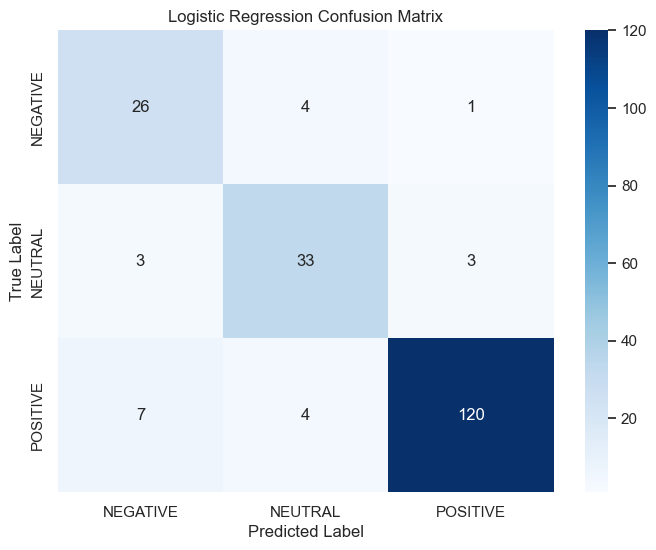

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm_lr = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['NEGATIVE', 'NEUTRAL', 'POSITIVE'], yticklabels=['NEGATIVE', 'NEUTRAL', 'POSITIVE'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

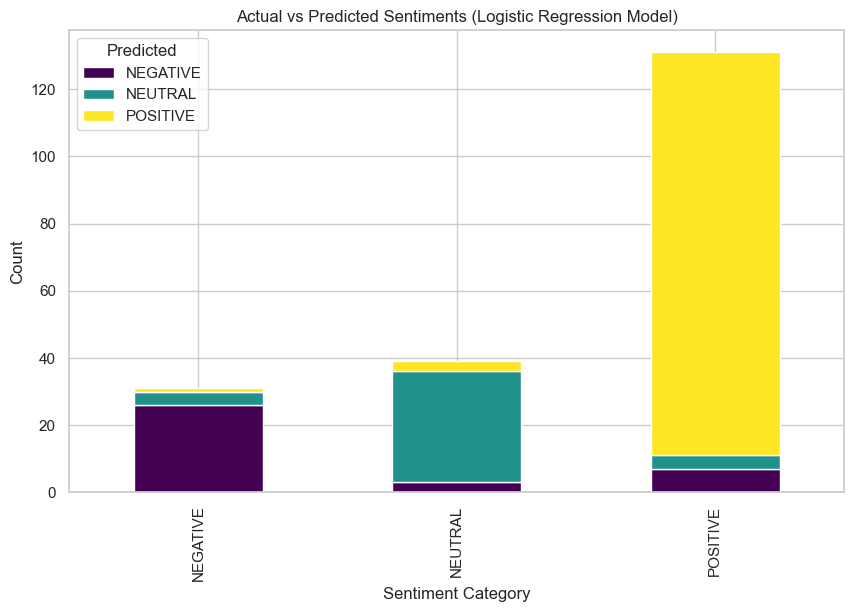

In [68]:
# Combine actual and predicted sentiments into a DataFrame
comparison_df_lr = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Count the occurrences of each combination
comparison_counts_lr = comparison_df_lr.groupby(['Actual', 'Predicted']).size().unstack(fill_value=0)

# Plot the bar plot
comparison_counts_lr.plot(kind='bar', stacked=True, cmap='viridis', figsize=(10, 6))
plt.title('Actual vs Predicted Sentiments (Logistic Regression Model)')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()

# SVM

### Without oversampler

In [69]:
import sklearn
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Print class distribution in the training set
print("Training Class Distribution:")
print(y_train.value_counts())

# Print class distribution in the testing set
print("\nTesting Class Distribution:")
print(y_test.value_counts())

# Create and train the SVM model without oversampling
svm_model_no_oversampling = SVC(kernel='linear', class_weight='balanced', random_state=42)
svm_model_no_oversampling.fit(X_train_df, y_train)

# Make predictions on the test set without oversampling
y_pred_svm_no_oversampling = svm_model_no_oversampling.predict(X_test_df)

# Evaluate the SVM model without oversampling
accuracy_svm_no_oversampling = accuracy_score(y_test, y_pred_svm_no_oversampling)
report_svm_no_oversampling = classification_report(y_test, y_pred_svm_no_oversampling)

print(f'Accuracy: {accuracy_svm_no_oversampling:.4f}')
print('Classification Report:')
print(report_svm_no_oversampling)


Training Class Distribution:
POSITIVE    554
NEUTRAL     158
NEGATIVE     88
Name: predicted_sentiment_category, dtype: int64

Testing Class Distribution:
POSITIVE    131
NEUTRAL      39
NEGATIVE     31
Name: predicted_sentiment_category, dtype: int64
Accuracy: 0.8756
Classification Report:
              precision    recall  f1-score   support

    NEGATIVE       0.78      0.81      0.79        31
     NEUTRAL       0.70      0.85      0.77        39
    POSITIVE       0.97      0.90      0.93       131

    accuracy                           0.88       201
   macro avg       0.82      0.85      0.83       201
weighted avg       0.89      0.88      0.88       201



### With oversampler

In [72]:
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import RandomOverSampler

# Print class distribution in the training set
print("Training Class Distribution:")
print(y_train_resampled.value_counts())

# Print class distribution in the testing set
print("\nTesting Class Distribution:")
print(y_test.value_counts())

# Create and apply oversampler
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_df, y_train)

c_values=[0.90]

for c in c_values:
    # Create and train the SVM model with oversampling
    svm_model_with_oversampling = SVC(kernel='linear', class_weight='balanced',C=c, random_state=42)
    svm_model_with_oversampling.fit(X_train_resampled, y_train_resampled)


    # Make predictions on the test set with oversampling
    y_pred_svm_with_oversampling = svm_model_with_oversampling.predict(X_test_df)

    # Evaluate the SVM model with oversampling
    accuracy_svm_with_oversampling = accuracy_score(y_test, y_pred_svm_with_oversampling)
    report_svm_with_oversampling = classification_report(y_test, y_pred_svm_with_oversampling)

    print(f'Accuracy: {accuracy_svm_with_oversampling:.4f}')
    print('Classification Report:')
    print(report_svm_with_oversampling)


Training Class Distribution:
NEUTRAL     554
POSITIVE    554
NEGATIVE    554
Name: predicted_sentiment_category, dtype: int64

Testing Class Distribution:
POSITIVE    131
NEUTRAL      39
NEGATIVE     31
Name: predicted_sentiment_category, dtype: int64
Accuracy: 0.8856
Classification Report:
              precision    recall  f1-score   support

    NEGATIVE       0.73      0.77      0.75        31
     NEUTRAL       0.76      0.87      0.81        39
    POSITIVE       0.98      0.92      0.94       131

    accuracy                           0.89       201
   macro avg       0.82      0.85      0.83       201
weighted avg       0.89      0.89      0.89       201



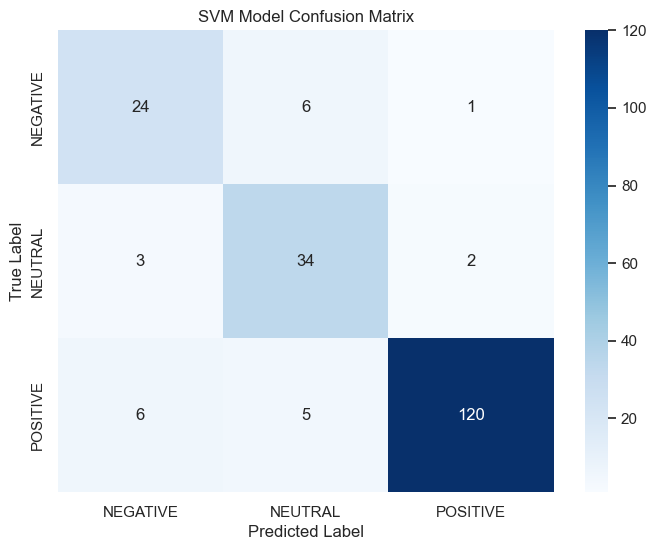

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm_svm = confusion_matrix(y_test,y_pred_svm_with_oversampling)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['NEGATIVE', 'NEUTRAL', 'POSITIVE'], yticklabels=['NEGATIVE', 'NEUTRAL', 'POSITIVE'])
plt.title('SVM Model Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


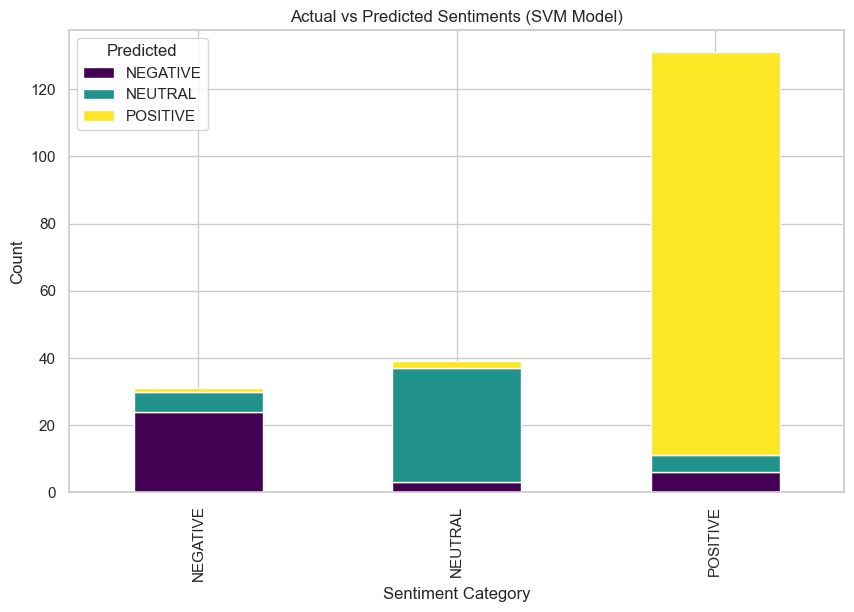

In [74]:
# Combine actual and predicted sentiments into a DataFrame
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_svm_with_oversampling})

# Count the occurrences of each combination
comparison_counts = comparison_df.groupby(['Actual', 'Predicted']).size().unstack(fill_value=0)

# Plot the bar plot
comparison_counts.plot(kind='bar', stacked=True, cmap='viridis', figsize=(10, 6))
plt.title('Actual vs Predicted Sentiments (SVM Model)')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()


## Multinomial Naive Bayes

### Without oversampler

In [578]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Print class distribution in the training set
print("Training Class Distribution:")
print(y_train.value_counts())

# Print class distribution in the testing set
print("\nTesting Class Distribution:")
print(y_test.value_counts())

# Create and train the Multinomial Naive Bayes model
multinomial_nb_model_no_oversampler = MultinomialNB()
multinomial_nb_model_no_oversampler.fit(X_train_df, y_train)

# Make predictions on the test set
y_pred = multinomial_nb_model_no_oversampler.predict(X_test_df)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
report = classification_report(y_test, y_pred)

print(f'\nAccuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print('Classification Report:')
print(report)


Training Class Distribution:
POSITIVE    554
NEUTRAL     158
NEGATIVE     88
Name: predicted_sentiment_category, dtype: int64

Testing Class Distribution:
POSITIVE    131
NEUTRAL      39
NEGATIVE     31
Name: predicted_sentiment_category, dtype: int64

Accuracy: 0.6716
Precision: 0.7817
Recall: 0.6716
F1-score: 0.5580
Classification Report:
              precision    recall  f1-score   support

    NEGATIVE       1.00      0.03      0.06        31
     NEUTRAL       1.00      0.08      0.14        39
    POSITIVE       0.66      1.00      0.80       131

    accuracy                           0.67       201
   macro avg       0.89      0.37      0.33       201
weighted avg       0.78      0.67      0.56       201



### With oversampler

In [579]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Print class distribution in the training set
print("Training Class Distribution:")
print(y_train_resampled.value_counts())

# Print class distribution in the testing set
print("\nTesting Class Distribution:")
print(y_test.value_counts())

# Create and train the Multinomial Naive Bayes model
multinomial_nb_model = MultinomialNB()
multinomial_nb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = multinomial_nb_model.predict(X_test_df)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
report = classification_report(y_test, y_pred)

print(f'\nAccuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print('Classification Report:')
print(report)


Training Class Distribution:
NEUTRAL     554
POSITIVE    554
NEGATIVE    554
Name: predicted_sentiment_category, dtype: int64

Testing Class Distribution:
POSITIVE    131
NEUTRAL      39
NEGATIVE     31
Name: predicted_sentiment_category, dtype: int64

Accuracy: 0.8856
Precision: 0.8963
Recall: 0.8856
F1-score: 0.8881
Classification Report:
              precision    recall  f1-score   support

    NEGATIVE       0.68      0.87      0.76        31
     NEUTRAL       0.88      0.77      0.82        39
    POSITIVE       0.95      0.92      0.94       131

    accuracy                           0.89       201
   macro avg       0.84      0.85      0.84       201
weighted avg       0.90      0.89      0.89       201



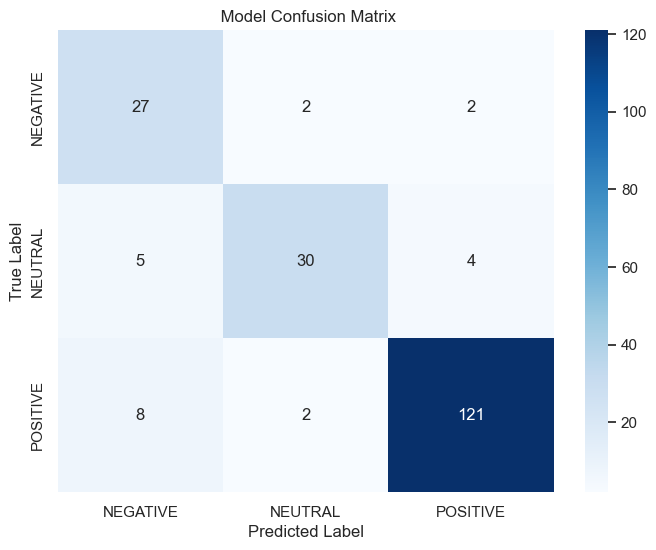

In [580]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm_MNB = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_MNB, annot=True, fmt='d', cmap='Blues', xticklabels=['NEGATIVE', 'NEUTRAL', 'POSITIVE'], yticklabels=['NEGATIVE', 'NEUTRAL', 'POSITIVE'])
plt.title(' Model Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


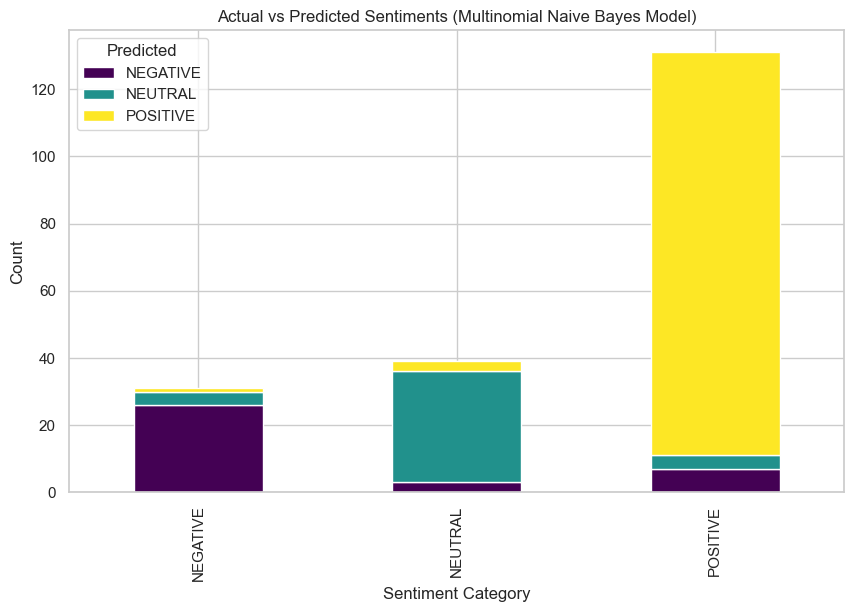

In [581]:
# Combine actual and predicted sentiments into a DataFrame
comparison_df_MNB = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Count the occurrences of each combination
comparison_counts_MNB = comparison_df_lr.groupby(['Actual', 'Predicted']).size().unstack(fill_value=0)

# Plot the bar plot
comparison_counts_MNB.plot(kind='bar', stacked=True, cmap='viridis', figsize=(10, 6))
plt.title('Actual vs Predicted Sentiments (Multinomial Naive Bayes Model)')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()

## Deployment

In [582]:
# Preprocess function
def preprocess_sentence(sentence):
    sentence = sentence.lower()
    sentence = remove_newline_characters(sentence)
    sentence = replace_with_custom_dict(sentence, custom_dict)
    sentence = convert_emojis_to_word(sentence)
    sentence = remove_emojis(sentence)

    sentence = translate_text(sentence, target_language='en')
    sentence = correct_spelling(sentence)
    sentence = remove_punctuation(sentence)
    tokens = tokenize_english(sentence)
    lemmatized_tokens = lemmatize_english(tokens)
    filtered_tokens = remove_english_stopwords(lemmatized_tokens)
    text_string = ' '.join(filtered_tokens)
    return text_string


In [ ]:
import tkinter as tk
from tkinter import ttk

# Function to handle button click event
def analyze_sentiment():
    user_sentence = entry.get()
    preprocessed_sentence = preprocess_sentence(user_sentence)
    sentence_vectorized = cv.transform([preprocessed_sentence])
    prediction = logistic_regression_model.predict(sentence_vectorized)
    
    # Configure font color based on sentiment
    if prediction[0] == 'POSITIVE':
        result_label.config(text=f"Predicted Sentiment: {prediction[0]}", foreground='green')
    elif prediction[0] == 'NEUTRAL':
        result_label.config(text=f"Predicted Sentiment: {prediction[0]}", foreground='blue')
    elif prediction[0] == 'NEGATIVE':
        result_label.config(text=f"Predicted Sentiment: {prediction[0]}", foreground='red')

# Create main window
window = tk.Tk()
window.title("Sentiment Analysis App")

# Change background color
window.configure(bg='#FCF6F5')

# Create and place widgets
label = ttk.Label(window, text="Enter a sentence:")
label.grid(row=0, column=0, padx=10, pady=10)

entry = ttk.Entry(window, width=40)
entry.grid(row=0, column=1, padx=10, pady=10)

# Set button style
style = ttk.Style()
style.configure('TButton', font=('Helvetica', 12))

# Create button with custom styling
analyze_button = tk.Button(window, text="Analyze Sentiment", command=analyze_sentiment, bg='#990011', fg='white', font=('Helvetica', 12))
analyze_button.grid(row=1, column=0, columnspan=2, pady=10)

# Hover color
analyze_button.bind("<Enter>", lambda e: analyze_button.config(bg='#cc0022'))
analyze_button.bind("<Leave>", lambda e: analyze_button.config(bg='#990011'))

result_label = ttk.Label(window, text="")
result_label.grid(row=2, column=0, columnspan=2, pady=10)

# Run the main loop
window.mainloop()
